**1- IMPORTING DATASET:**

In [160]:
import pandas as pd
import numpy as np
import keras
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('bank.csv')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


**2- DATA ANALYSIS:**

In [ ]:
df.info

<bound method DataFrame.info of        age          job  marital  education  ... pdays  previous poutcome deposit
0       59       admin.  married  secondary  ...    -1         0  unknown     yes
1       56       admin.  married  secondary  ...    -1         0  unknown     yes
2       41   technician  married  secondary  ...    -1         0  unknown     yes
3       55     services  married  secondary  ...    -1         0  unknown     yes
4       54       admin.  married   tertiary  ...    -1         0  unknown     yes
...    ...          ...      ...        ...  ...   ...       ...      ...     ...
11157   33  blue-collar   single    primary  ...    -1         0  unknown      no
11158   39     services  married  secondary  ...    -1         0  unknown      no
11159   32   technician   single  secondary  ...    -1         0  unknown      no
11160   43   technician  married  secondary  ...   172         5  failure      no
11161   34   technician  married  secondary  ...    -1         0  

In [ ]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

*Having the first 5 rows:*

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


*Having the last 5 rows:*

In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


*Data Descripton:*

In [ ]:
D=df.describe()
D

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**3- DATA VISUALIZATION:**

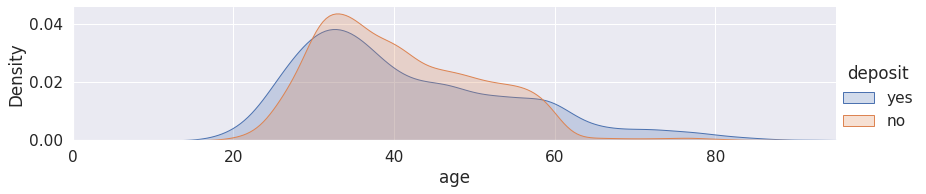

In [ ]:
facet = sns.FacetGrid(df, hue="deposit",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max())) 
facet.add_legend()
 
plt.show()

*'deposit' column values' variation depending on 'education' column's values:*

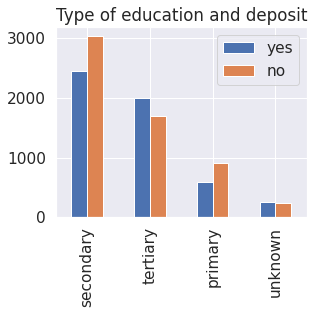

In [ ]:
ed= pd.DataFrame()
ed['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
ed['no'] = df[df['deposit'] == 'no']['education'].value_counts()

ed.plot.bar(title = 'Type of education and deposit')

*'deposit' column values' variation depending on 'job' column's values:*

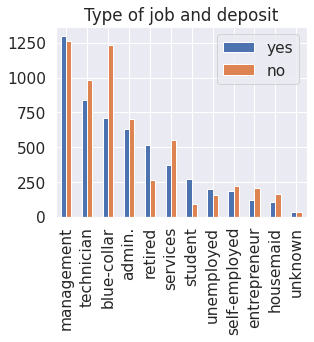

In [ ]:
jd= pd.DataFrame()
jd['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
jd['no'] = df[df['deposit'] == 'no']['job'].value_counts()

jd.plot.bar(title = 'Type of job and deposit')

*'deposit' column values' variation depending on 'Marital status' column's values:*

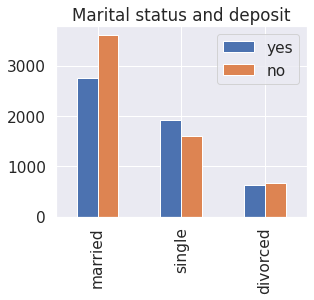

In [ ]:
msd = pd.DataFrame()

msd['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
msd['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

msd.plot.bar(title = 'Marital status and deposit')

**4- DATASET CLEANING:**

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**5- BUILDING A DEEP LEARNING NETWORK:**\
**Data Preprocessing:*

In [ ]:
df_cust = df[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome','deposit']]

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


*Encoding categorical data with LabelEncoder:*

In [ ]:
le = preprocessing.LabelEncoder()
df_cust = df_cust.apply(le.fit_transform)
df_cust

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,0,1,1,0,1,0,2,8,3,1
1,0,1,1,0,0,0,2,8,3,1
2,9,1,1,0,1,0,2,8,3,1
3,7,1,1,0,1,0,2,8,3,1
4,0,1,2,0,0,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...
11157,1,2,0,0,1,0,0,0,3,0
11158,7,1,1,0,0,0,2,6,3,0
11159,9,2,1,0,0,0,0,1,3,0
11160,9,1,1,0,0,1,0,8,0,0


In [ ]:
df['job']=df_cust['job'].values
df['marital']=df_cust['marital'].values
df['education']=df_cust['education'].values
df['default']=df_cust['default'].values
df['housing']=df_cust['housing'].values
df['loan']=df_cust['loan'].values
df['contact']=df_cust['contact'].values
df['month']=df_cust['month'].values
df['poutcome']=df_cust['poutcome'].values
df['deposit']=df_cust['deposit'].values

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
X = df.iloc[:, 0:16].values
y = df.iloc[:, 16].values

*Splitting the dataset into the Training set and Test set*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

*Feature Scaling:*

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_test.shape

(2233, 16)

In [ ]:
X_train.shape

(8929, 16)

*Building ANN Model:*

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer (with dropout)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16)) # 6 nodes in hidden layer, initialize weights uniformly, use rectifier funtion for hidden layer, except 11 input nodes
classifier.add(Dropout( 0.1)) # Disable 10% of the neurons on each iteration

# Adding the second hidden layer (with dropout)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) # input_dim already specified in previous hidden layer
classifier.add(Dropout( 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # only 1 node in output layer, use sigmoid function for probability

*Training ANN model:*

In [ ]:
#Compiling the ANN - apply stochastic gradient descent
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # loss defined this way since output is binary, only 1 output node

# Fitting the ANN to the Training set
history=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
893/893 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7576
Epoch 2/100
893/893 [==============================] - 2s 2ms/step - loss: 0.4752 - accuracy: 0.7900
Epoch 3/100
893/893 [==============================] - 2s 2ms/step - loss: 0.4721 - accuracy: 0.7909
Epoch 4/100
893/893 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.7955
Epoch 5/100
893/893 [==============================] - 1s 2ms/step - loss: 0.4641 - accuracy: 0.7946
Epoch 6/100
893/893 [==============================] - 1s 2ms/step - loss: 0.4631 - accuracy: 0.7950
Epoch 7/100
893/893 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.7964
Epoch 8/100
893/893 [==============================] - 1s 2ms/step - loss: 0.4587 - accuracy: 0.7967
Epoch 9/100
893/893 [==============================] - 2s 2ms/step - loss: 0.4597 - accuracy: 0.7975
Epoch 10/100
893/893 [==============================] - 2s 2ms/step - loss: 0.4571 - accura

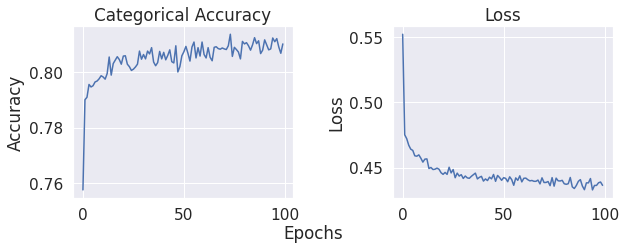

In [ ]:
fig_w, fig_h = (4.5, 3.5)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
fig, axs = plt.subplots(1, 2, figsize=(2*fig_w,fig_h))

plt.sca(axs[0])
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy')
plt.title('Categorical Accuracy')

plt.sca(axs[1])
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.title('Loss')

plt.tight_layout()
fig.text(0.5, 0.01,'Epochs', ha='center')
plt.show()

*Making the predictions and evaluating the model:*

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # Set threshold for returning true or false

# EXAMPLE: Predicting a single new observation
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000,8,1000,456,85963,45]]))) # Manually encode all independent variables, scale to training set
new_prediction = (new_prediction > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[943 244]
 [160 886]]


In [ ]:
labels=list(pd.get_dummies(df['deposit']).columns)
labels

[0, 1]

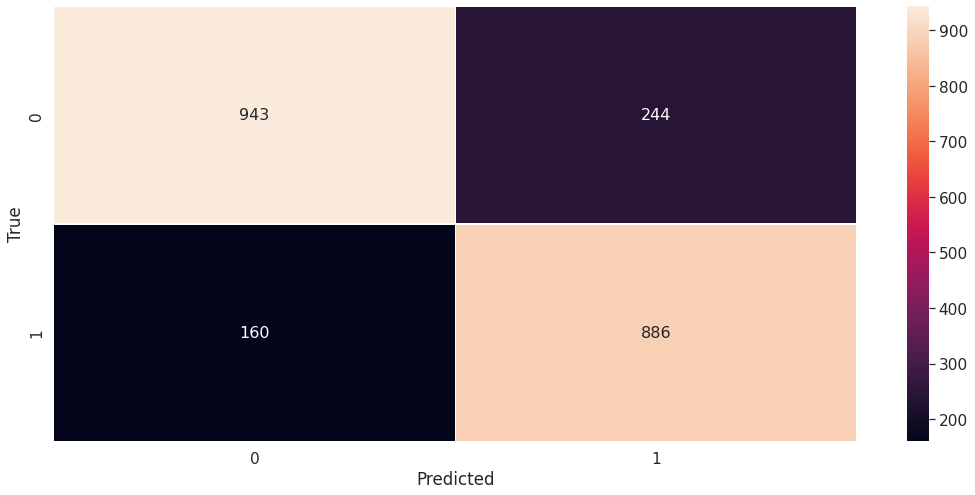

In [ ]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5, xticklabels=labels, yticklabels=labels) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()